In [1]:
import math
import numpy as np
from sklearn import datasets, model_selection, neighbors, metrics
import operator
from scipy import sparse
from collections import Counter
from matplotlib import pylab

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.3)

y = y_test.reshape((45, 1))
train_set = np.append(X_test, y, axis=1)

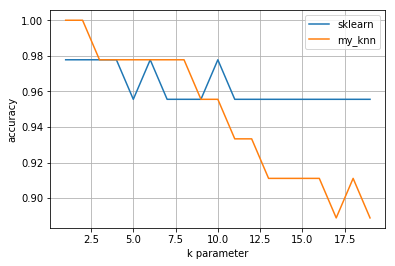

In [52]:
import my_knn_realisation_2

sklearn_results = []
my_knn_results = []

index_array = [i for i in range(1, 20, 1)]

for i in index_array:
    sklearn_knn = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    sklearn_res = sklearn_knn.predict(X_test)
    sklearn_acc = metrics.accuracy_score(y_test, sklearn_res)
    sklearn_results.append(sklearn_acc)
    
    my_knn_cl = my_knn_realisation_2.my_knn(i)
    my_knn_cl.fit(train_set)
    my_knn_res = my_knn_cl.predict(X_test)
    my_knn_acc = metrics.accuracy_score(y_test, my_knn_res)
    my_knn_results.append(my_knn_acc)

pylab.grid(True)
pylab.plot(index_array, sklearn_results, label='sklearn')
pylab.plot(index_array, my_knn_results, label='my_knn') 
pylab.xlabel('k parameter')
pylab.ylabel('accuracy')
pylab.legend()